In [31]:
import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd
from pylab import figure, axes, pie, title, show
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [2]:
cd C:\Users\Charles\Desktop\AI Cough Detection\Cough

C:\users\charles\desktop\AI Cough Detection\cough


0.0    1960
1.0      40
Name: label, dtype: int64

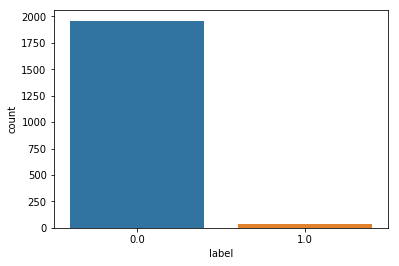

In [3]:
# Class Distribution
df_data = pd.read_csv('train_labels.csv')
g = sns.countplot(df_data['label'])
df_data['label'].value_counts()

In [4]:
# define directories
base_dir = "./"
esc_dir = os.path.join(base_dir, "cough")
meta_file = os.path.join(base_dir, "train_labels_2000.csv")
audio_dir = os.path.join(base_dir, "train/")

In [5]:
'''#Converting the contents into a list
list_array=os.listdir(audio_dir)
for y in range(len(list_array)): 
    print list_array[y]'''

'#Converting the contents into a list\nlist_array=os.listdir(audio_dir)\nfor y in range(len(list_array)): \n    print list_array[y]'

In [6]:
# load metadata
meta_data = pd.read_csv(meta_file)
meta_data

,filename,label
0,1-100032-A-0.wav,0
1,1-100038-A-14.wav,0
2,1-100210-A-36.wav,0
3,1-100210-B-36.wav,0
4,1-101296-A-19.wav,0
5,1-101296-B-19.wav,0
6,1-101336-A-30.wav,0
7,1-101404-A-34.wav,0
8,1-103298-A-9.wav,0
9,1-103995-A-30.wav,0


In [7]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

In [8]:
# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [9]:
# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

In [36]:
# display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
   # plt.colorbar()
    plt.show()


In [11]:
'''# example data
x, fs = load_wave_data(audio_dir, meta_data.loc[0,"filename"])
melsp = calculate_melsp(x)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x)
show_melsp(melsp, fs)
'''

'# example data\nx, fs = load_wave_data(audio_dir, meta_data.loc[0,"filename"])\nmelsp = calculate_melsp(x)\nprint("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))\nshow_wave(x)\nshow_melsp(melsp, fs)\n'

In [12]:
#ipd.Audio(x, rate=fs)

In [13]:
# data augmentation: add white noise
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [14]:
'''x_wn = add_white_noise(x)
melsp = calculate_melsp(x_wn)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_wn.shape, melsp.shape, fs))
show_wave(x_wn)
show_melsp(melsp, fs)'''

'x_wn = add_white_noise(x)\nmelsp = calculate_melsp(x_wn)\nprint("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_wn.shape, melsp.shape, fs))\nshow_wave(x_wn)\nshow_melsp(melsp, fs)'

In [15]:
#ipd.Audio(x_wn, rate=fs)

In [16]:
# data augmentation: shift sound in timeframe
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [17]:
'''x_ss = shift_sound(x)
melsp = calculate_melsp(x_ss)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_ss.shape, melsp.shape, fs))
show_wave(x_ss)
show_melsp(melsp, fs)'''

'x_ss = shift_sound(x)\nmelsp = calculate_melsp(x_ss)\nprint("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_ss.shape, melsp.shape, fs))\nshow_wave(x_ss)\nshow_melsp(melsp, fs)'

In [18]:
#ipd.Audio(x_ss, rate=fs)

In [19]:
# data augmentation: stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

In [20]:
'''x_st = stretch_sound(x)
melsp = calculate_melsp(x_st)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_st.shape, melsp.shape, fs))
show_wave(x_st)
show_melsp(melsp, fs)'''

'x_st = stretch_sound(x)\nmelsp = calculate_melsp(x_st)\nprint("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_st.shape, melsp.shape, fs))\nshow_wave(x_st)\nshow_melsp(melsp, fs)'

In [21]:
#ipd.Audio(x_st, rate=fs)

In [32]:
def savefig(melsp, x):
    librosa.display.specshow(melsp)
    plt.savefig(melsp)

    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = librosa.display.specshow(librosa.amplitude_to_db(melsp, ref=np.max), ax=ax, y_axis='log', x_axis='time')
    fig.savefig('spec.png')

NameError: name 'out' is not defined

In [22]:
'''!git init
!git add .
!git commit -m "Initial commit"
!git remote add origin https://github.com/CharlesNJohn/Cough.git
!git push -f origin master'''

'!git init\n!git add .\n!git commit -m "Initial commit"\n!git remote add origin https://github.com/CharlesNJohn/Cough.git\n!git push -f origin master'

In [23]:
#!git remote -v

In [24]:
#!git push origin master

In [25]:
#!git commit -m "updated"

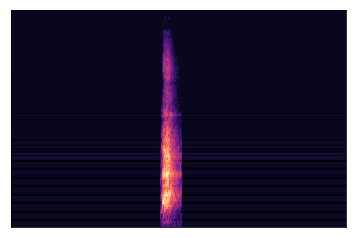

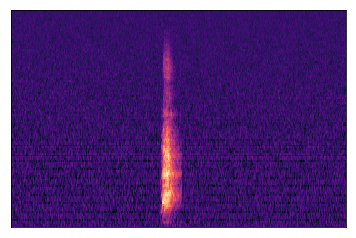

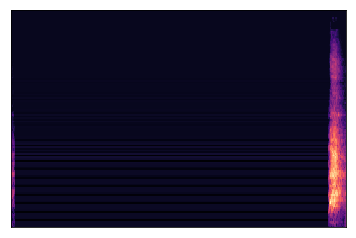

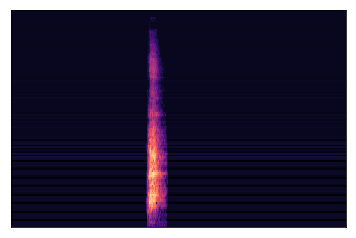

0


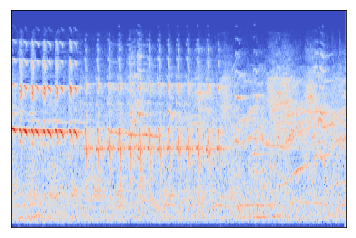

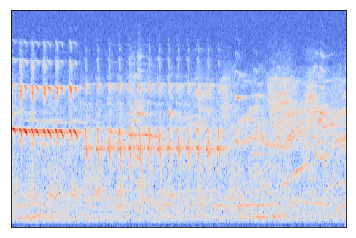

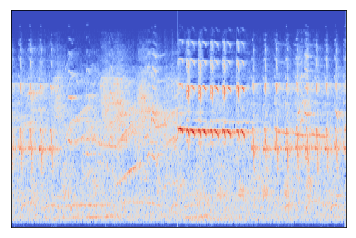

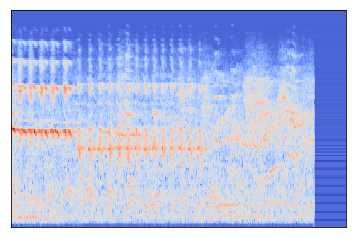

1


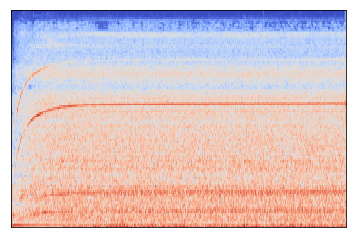

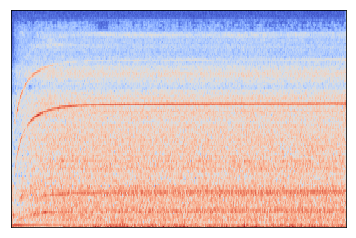

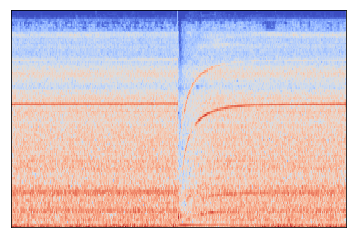

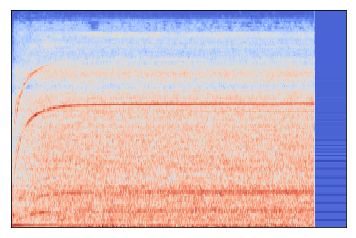

2


KeyboardInterrupt: 

In [37]:
for filename in os.listdir(audio_dir):
    for i in range(0, 2000):
        #if filename.endswith(".wav"):
        # example data
        
            x, fs = load_wave_data(audio_dir, meta_data.loc[i,"filename"])
            melsp = calculate_melsp(x)
            #print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
            show_melsp(melsp, fs)
            plt.savefig('test_sam.png')

            x_wn = add_white_noise(x)
            melsp = calculate_melsp(x_wn)
            #print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_wn.shape, melsp.shape, fs))
            show_melsp(melsp, fs)
            plt.savefig('test_wn.png')

            x_ss = shift_sound(x)
            melsp = calculate_melsp(x_ss)
            #print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_ss.shape, melsp.shape, fs))
            show_melsp(melsp, fs)
            plt.savefig('test_shs.png')

            x_st = stretch_sound(x)
            melsp = calculate_melsp(x_st)
            #print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_st.shape, melsp.shape, fs))
            show_melsp(melsp, fs)
            plt.savefig('test_ss.png')
            print(i)
        #    continue
       # else:
         #   continue